In [1]:
# keras imports for the dataset and building our neural network
import tensorflow as tf
from keras.datasets import cifar10

In [2]:
# loading the dataset
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

In [3]:
# reshape the training and testing data
test_x.shape

(10000, 32, 32, 3)

In [4]:
test_x_rs = test_x.reshape(10000, 32, 32, 3)

In [5]:
test_x_rs

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [6]:
test_y.shape

(10000, 1)

In [7]:
test_y_rs = test_y.reshape(10000, 1)

In [8]:
test_y_rs

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

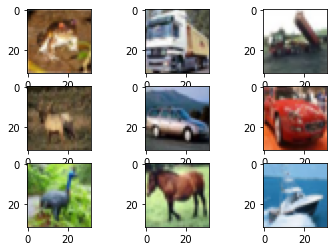

In [9]:
from matplotlib import pyplot
# plot first few images
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# plot raw pixel data
    pyplot.imshow(train_x[i])
# show the figure
pyplot.show()

In [10]:
# normalizing the data to help with the training
train_x

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [11]:
test_x

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [12]:
train_y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
# determine the shape of the input images
img_shape = train_x.shape[1:]
print(img_shape)

(32, 32, 3)


In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

In [15]:
#use these two lines when you use tensorflow models.
#This woud avoid several warnings and errors
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [16]:
model = Sequential([
    #model expects rows of feature data with shape input_shape using img_shape

    layers.InputLayer(input_shape=(img_shape)),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),  #hidden layer
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(48, (3, 3), padding='same', activation='relu'),  #hidden layer
    layers.AveragePooling2D((2, 2)),
    
    layers.Flatten(), #create array of pixels of single dimension since Dense takes 1D input
    
    layers.Dense(500, activation='relu'),  #hidden layer
    
    #no activation function is used inside output layer
# Use Dense for the output layer. This layer is to be activated by softmax function.
    layers.Dense(10, activation='softmax')  #output layer
])

2022-03-22 05:03:16.844123: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 48)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1

In [18]:
#the from_logits=True attribute informs the loss function that the output values 
#generated by the model are not normalized
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
train_x.shape

(50000, 32, 32, 3)

In [20]:
train_y.shape

(50000, 1)

In [21]:
# training the model for 5 epochs
model.fit(train_x, train_y, epochs=5)

Epoch 1/5
   3/1563 [..............................] - ETA: 1:04 - loss: 113.0127 - accuracy: 0.1146

/Users/jiyeyu/.local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 70s 44ms/step - loss: 2.2965 - accuracy: 0.4224
Epoch 2/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2434 - accuracy: 0.5618
Epoch 3/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.0297 - accuracy: 0.6412
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8586 - accuracy: 0.7021
Epoch 5/5
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6922 - accuracy: 0.7604


In [22]:
# finding accuracy of the model
score = model.evaluate(test_x_rs, test_y_rs, verbose=2)

313/313 - 4s - loss: 1.3041 - accuracy: 0.5960 - 4s/epoch - 13ms/step


In [23]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.304072618484497
Test accuracy: 0.5960000157356262


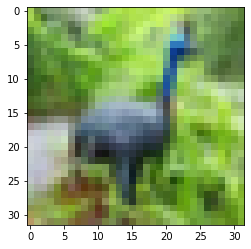

In [24]:
from matplotlib import pyplot as plt
import numpy as np
# Pick the 5th image from the dataset. it is a car
image = train_x[6]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

/Users/jiyeyu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


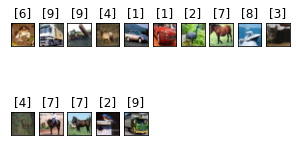

In [25]:
import numpy as np

fig = plt.figure(figsize=(5,3))
for i in range (15):
    ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_x[i]), cmap='gray')
    ax.set_title(train_y[i])

In [26]:
from numpy import unique, argmax
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
# print will be 1
print('Predicted: {}'.format(argmax(p)))

Predicted: 2


In [27]:
test_x_rs.shape

(10000, 32, 32, 3)

In [28]:
test_y_rs.shape

(10000, 1)